In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:

from sklearn.datasets import load_digits
X,y = load_digits(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=50, n_init='auto', random_state=101)

km.fit(X_train)
representative_digit_idx = km.transform(X_train).argmin(axis=0)
representive_digits = X_train[representative_digit_idx]

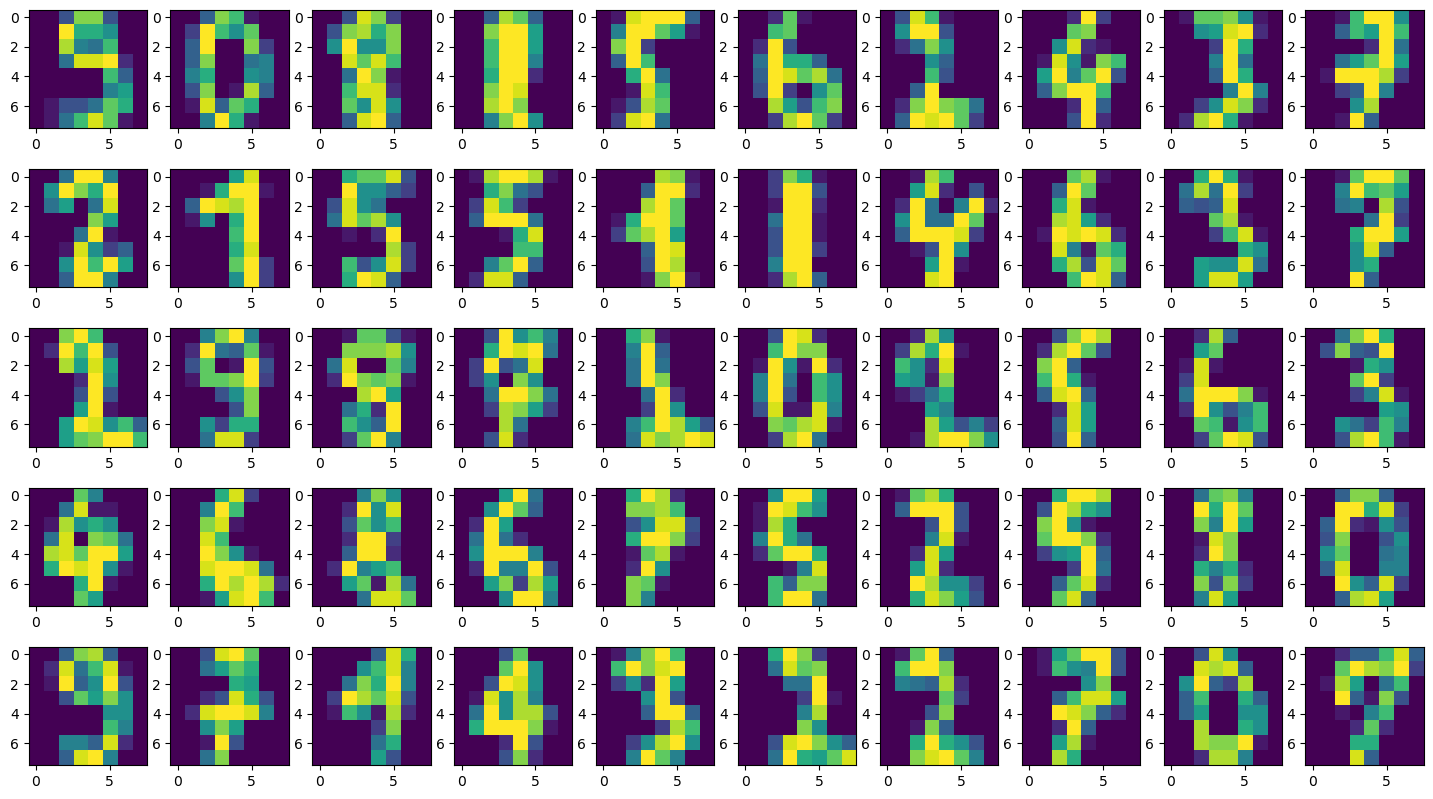

In [5]:
fig, ax = plt.subplots(nrows=5,ncols=10,figsize=(18,10))

k=0
for i in range(0,5):
    for j in range(0,10):
        ax[i,j].imshow(representive_digits[k].reshape(8,8))
        k+=1

In [6]:
from sklearn.linear_model import LogisticRegression

log_rep = LogisticRegression(n_jobs=-1, max_iter=10**6, random_state=101)
log_rep.fit(representive_digits, y_train[representative_digit_idx])

LogisticRegression(max_iter=1000000, n_jobs=-1, random_state=101)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, log_rep.predict(X_test))

0.9326599326599326

In [8]:
cluster_lable = km.predict(X_train)

In [9]:
y_train_rep = y_train[representative_digit_idx[cluster_lable]]

In [11]:
log_rep.fit(X_train, y_train_rep)

LogisticRegression(max_iter=1000000, n_jobs=-1, random_state=101)

In [12]:
accuracy_score(y_test, log_rep.predict(X_test))

0.9292929292929293